<a href="https://colab.research.google.com/github/effat38718/CVPR_assignment/blob/master/mid_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()
print(f"train img shape{train_imgs.shape}")
print(f"train img shape{train_labels.shape}")
print(f"test img shape{train_imgs.shape}")
print(f"test img shape{train_labels.shape}")
print("test img data type :",type(train_imgs))

11501568/11490434 [==============================] - 0s 0us/step
train img shape(60000, 28, 28)
train img shape(60000,)
test img shape(60000, 28, 28)
test img shape(60000,)
test img data type : <class 'numpy.ndarray'>


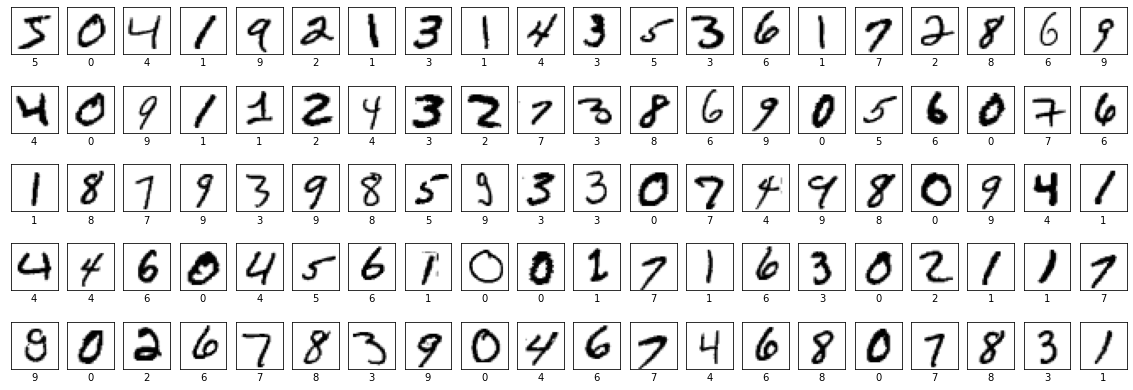

In [3]:
R = 5
C = 20
i = 0
plt.figure(figsize=(20,7))
for r in range(R):
    for c in range(C):
        plt.subplot(R,C,i+1)
        plt.imshow(train_imgs[i], cmap='gray_r')
        plt.xlabel(train_labels[i])
        plt.xticks([])
        plt.yticks([])
        i += 1

In [13]:
train_imgs, test_imgs = train_imgs.reshape(-1,28,28,1), test_imgs.reshape(-1,28,28,1)

In [14]:

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=56, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 56)        32312     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                89664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [15]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [16]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.1597 - accuracy: 0.9500 - val_loss: 0.0543 - val_accuracy: 0.9841
Epoch 2/10
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0498 - accuracy: 0.9848 - val_loss: 0.0553 - val_accuracy: 0.9843
Epoch 3/10
1500/1500 [==============================] - 67s 44ms/step - loss: 0.0344 - accuracy: 0.9893 - val_loss: 0.0604 - val_accuracy: 0.9820
Epoch 4/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0448 - val_accuracy: 0.9883
Epoch 5/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0489 - val_accuracy: 0.9870
Epoch 6/10
1500/1500 [==============================] - 62s 42ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0437 - val_accuracy: 0.9895
Epoch 7/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0378 -

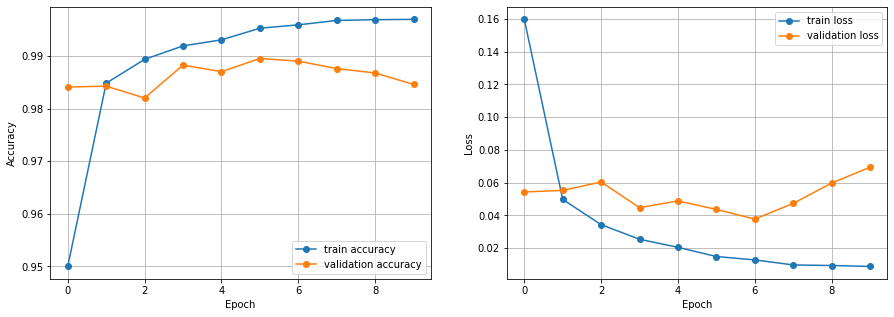

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.0636 - accuracy: 0.9867

Test Accuracy: 0.9866999983787537

Test Loss: 0.06358189135789871


In [21]:
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [22]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 65s 43ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.0455 - val_accuracy: 0.9897
Epoch 2/10
1500/1500 [==============================] - 64s 43ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0447 - val_accuracy: 0.9899
Epoch 3/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0444 - val_accuracy: 0.9904
Epoch 4/10
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0451 - val_accuracy: 0.9907
Epoch 5/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0450 - val_accuracy: 0.9906
Epoch 6/10
1500/1500 [==============================] - 61s 41ms/step - loss: 9.0572e-04 - accuracy: 0.9999 - val_loss: 0.0452 - val_accuracy: 0.9905
Epoch 7/10
1500/1500 [==============================] - 62s 41ms/step - loss: 7.9639e-04 - accuracy: 0.9999 - val_loss: 

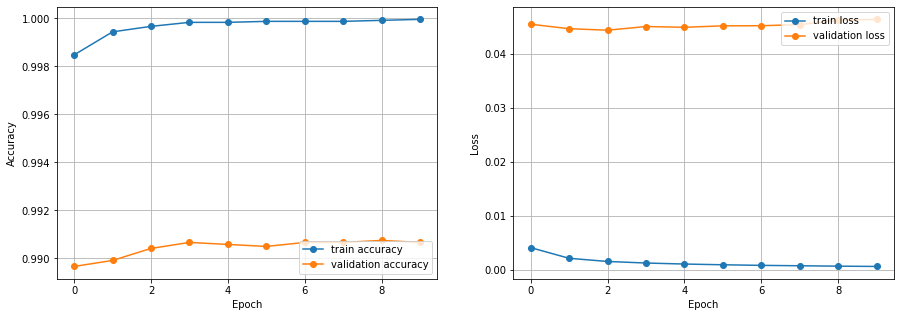

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [24]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 11ms/step - loss: 0.0394 - accuracy: 0.9922

Test Accuracy: 0.9922000169754028

Test Loss: 0.039440542459487915


In [26]:
model.compile(
    optimizer='rmsprop', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [27]:
h = model.fit(x=train_imgs, y=train_labels, epochs=10, validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0028 - accuracy: 0.9990 - val_loss: 0.0646 - val_accuracy: 0.9912
Epoch 2/10
1500/1500 [==============================] - 64s 42ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0740 - val_accuracy: 0.9916
Epoch 3/10
1500/1500 [==============================] - 63s 42ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0805 - val_accuracy: 0.9918
Epoch 4/10
1500/1500 [==============================] - 63s 42ms/step - loss: 8.7438e-04 - accuracy: 0.9997 - val_loss: 0.0961 - val_accuracy: 0.9906
Epoch 5/10
1500/1500 [==============================] - 63s 42ms/step - loss: 6.8200e-04 - accuracy: 0.9998 - val_loss: 0.0938 - val_accuracy: 0.9918
Epoch 6/10
1500/1500 [==============================] - 64s 43ms/step - loss: 5.7571e-04 - accuracy: 0.9998 - val_loss: 0.1117 - val_accuracy: 0.9907
Epoch 7/10
1500/1500 [==============================] - 64s 43ms/step - loss: 4.8172e-04 - accuracy: 0.9999 - va

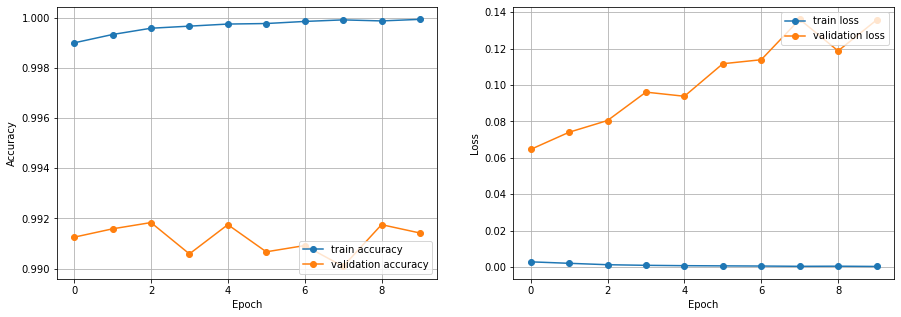

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss, test_acc = model.evaluate(test_imgs, test_labels)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.1091 - accuracy: 0.9917

Test Accuracy: 0.9916999936103821

Test Loss: 0.10911384224891663
